## 코랩 연결 끊김 방지



```
function ClickConnect(){
  console.log("Connnect Clicked - Start"); 
  document.querySelector("#top-toolbar > colab-connect-button").shadowRoot.querySelector("#connect").click();
  console.log("Connnect Clicked - End"); 
};
var clickid = setInterval(ClickConnect, 60*1000)

clearInterval(clickid);
```




구글 드라이브 연결

[패키지 영구적(permanently)으로 설치하는 방법](https://teddylee777.github.io/colab/colab%EC%97%90%EC%84%9C-python%ED%8C%A8%ED%82%A4%EC%A7%80%EB%A5%BC-permanently-%EC%9D%B8%EC%8A%A4%ED%86%A8%ED%95%98%EB%8A%94-%EB%B0%A9%EB%B2%95)

In [1]:
import os, sys
# connect google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import torch
print(torch.__version__)

1.13.1+cu116


In [3]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


## 초기 한번만...


> yolov5 설치



In [ ]:
!git clone https://github.com/ultralytics/yolov5 # clone

Cloning into 'yolov5'...
remote: Enumerating objects: 15008, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 15008 (delta 2), reused 2 (delta 0), pack-reused 15002
Receiving objects: 100% (15008/15008), 14.09 MiB | 11.05 MiB/s, done.
Resolving deltas: 100% (10287/10287), done.


In [4]:
%cd yolov5

/content/drive/MyDrive/yolov5


In [5]:
# install dependencies
%pip install -qr requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.0/184.0 KB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 33.0 MB/s eta 0:00:00


## wandb 사용

> You'll Easily Log Everything if you combine W&B with YOLOv5.



In [16]:
%pip install wandb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 25.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.3/181.3 KB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 19.7 MB/s eta 0:00:00
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8806 sha256=df590c23543547797b6bcf2cae50e7ac61f555223305c3af41275341d7b4b9a1
  Stored in directory: /root/.cache/pip/wheels/4c/8e/7e/72fbc243e1aeecae64a96875432e70d4e92f3d2d18123be004
Successfully built pathtools
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


## 설치가 완료되면....

In [6]:
import utils

display = utils.notebook_init()  # checks

YOLOv5 🚀 v7.0-72-g064365d Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 24.4/78.2 GB disk)


## 샘플 예제 실행하기(객체 검출)

In [ ]:
!python detect.py --weights yolov5s.pt --conf 0.25 --img 960 --source data/images

detect: weights=['yolov5s.pt'], source=data/images, data=data/coco128.yaml, imgsz=[960, 960], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-72-g064365d Python-3.8.10 torch-1.13.1+cu116 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
image 1/2 /content/drive/MyDrive/yolov5/data/images/bus.jpg: 960x736 4 persons, 1 bus, 736.0ms
image 2/2 /content/drive/MyDrive/yolov5/data/images/zidane.jpg: 544x960 2 persons, 2 ties, 450.2ms
Speed: 7.5ms pre-process, 593.1ms inference, 11.0ms NMS per image at shape (1, 3, 960, 960)
Results saved to runs/detect/exp2


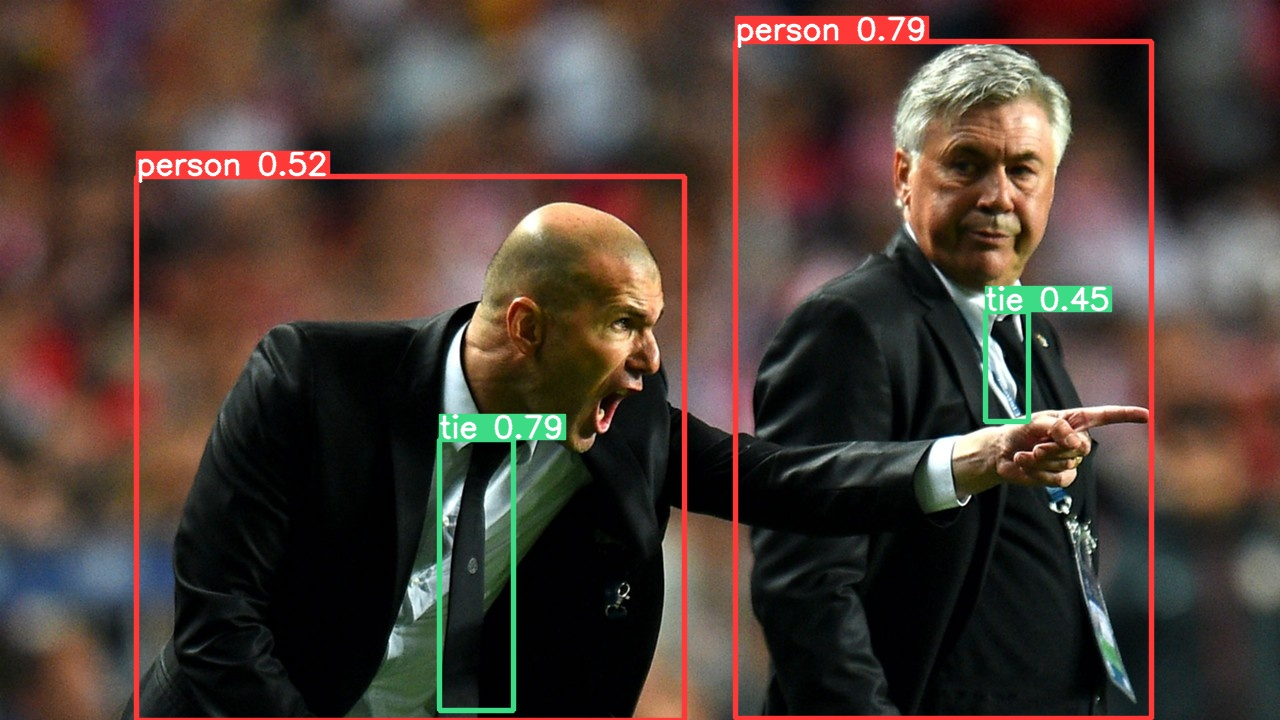

In [ ]:
display.Image(filename='runs/detect/exp2/zidane.jpg', width=600)

## 동영상에서 객체 검출하기


> detect.py 사용하기



In [23]:
!nohup python -u detect.py --weights runs/train/exp2/weights/best.pt --conf 0.25 --img 960 --source ./dron/220503남서울대정문1225.MP4 &

nohup: appending output to 'nohup.out'


In [25]:
!nohup python -u detect.py --weights runs/train/exp2/weights/best.pt --conf 0.25 --img 960 --source ./dron/220503남서울대정문1225.MP4 --classes 0 1 2 3 4 &

nohup: appending output to 'nohup.out'


In [24]:
!tail -f nohup.out

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
video 1/1 (13018/18014) /content/drive/MyDrive/yolov5/dron/220503남서울대정문1225.MP4: 544x960 11 cars, 2 s_trucks, 10 vans, 13.9ms
video 1/1 (13019/18014) /content/drive/MyDrive/yolov5/dron/220503남서울대정문1225.MP4: 544x960 10 cars, 2 s_trucks, 10 vans, 13.9ms
video 1/1 (13020/18014) /content/drive/MyDrive/yolov5/dron/220503남서울대정문1225.MP4: 544x960 10 cars, 2 s_trucks, 10 vans, 13.8ms
video 1/1 (13021/18014) /content/drive/MyDrive/yolov5/dron/220503남서울대정문1225.MP4: 544x960 10 cars, 1 s_truck, 11 vans, 13.8ms
video 1/1 (13022/18014) /content/drive/MyDrive/yolov5/dron/220503남서울대정문1225.MP4: 544x960 10 cars, 1 s_truck, 10 vans, 13.8ms
video 1/1 (13023/18014) /content/drive/MyDrive/yolov5/dron/220503남서울대정문1225.MP4: 544x960 10 cars, 2 s_trucks, 11 vans, 13.8ms
video 1/1 (13024/18014) /content/drive/MyDrive/yolov5/dron/220503남서울대정문1225.MP4: 544x960 10 cars, 2 s_trucks, 11 vans, 13.8ms
video 1/1 (130

## 동영상에서 바로 객체 검출하기


> torch.hub를 통한 모델 불러오기

>> 제공 모델 사용하기 or 커스텀 모델 사용하기

>> 동영상 -> 이미지 저장후 검출하기 or 동영상 프레임 추출 후 바로 검출하기






In [13]:
import torch
import cv2


# Model
model_origin = torch.hub.load('ultralytics/yolov5', 'yolov5s')  # or yolov5n - yolov5x6
# or
model_new = torch.hub.load('.', 'custom', path = 'runs/train/exp/weights/best.pt', source = 'local')
# or
#model = torch.load('runs/train/exp/weights/best.pt')

# 이미지 저장 경로
save_path = './dron/capture/'

# 영상의 의미지를 연속적으로 캡쳐할 수 있게 하는 class
vidcap = cv2.VideoCapture('./dron/220503남서울대정문1225.MP4')
#vidcap = cv2.VideoCapture('./Drone/DJI_0245.MP4')
print(vidcap.isOpened())

count = 0

while(vidcap.isOpened()):
    ret, frame = vidcap.read()

    if frame is None:
        print(f'the video ends!!\n')
        break

    # 이미지 사이즈 960x540으로 변경
    frame = cv2.resize(frame, (960, 540))
     
    # 30프레임당 하나씩 이미지 추출
    if(int(vidcap.get(1)) % 300 == 0):
        print('Saved frame number : ' + str(int(vidcap.get(cv2.CAP_PROP_FRAME_COUNT))))
        # 추출된 이미지가 저장되는 경로
        save_file = save_path +"220503남서울대정문1225_%03d.jpg" % count
        print(save_file)
        cv2.imwrite(save_file, frame)
        #print('Saved frame%d.jpg' % count)
        count += 1
        # Inference
        results1 = model_origin(save_file)
        results2 = model_new(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        # Results
        cmd = int(input('데이터를 하나씩 확인합시다 : '))
        if cmd == 1:
            break

        print('from saved image file')
        results1.show()  # or .show(), .save(), .crop(), .pandas(), etc.
        print('\nfrom memory image')
        results2.show()
        
        
vidcap.release()

Output hidden; open in https://colab.research.google.com to view.

## 학습 데이터 만들기


> openCV를 이용하여 동영상 열기 -> 루프를 돌면서 30프레임 당 1장씩 저장 -> 300 프레임이면 종료


In [ ]:
import torch

import cv2
import time

# 영상의 의미지를 연속적으로 캡쳐할 수 있게 하는 class
# 영상이 있는 경로
save_path = './drone/capture/'
vidcap = cv2.VideoCapture('./drone/220503남서울대정문1225.MP4')
print(vidcap.isOpened())
#vidcap = cv2.VideoCapture('./Drone/DJI_0245.MP4')

count = 0

while(vidcap.isOpened()):
    ret, image = vidcap.read()
    if ret == False:
        print(f'동영상을 끝까지 처리했습니다.!\n')
        break

    # 이미지 사이즈 960x540으로 변경
    image = cv2.resize(image, (960, 540))
     
    # 30프레임당 하나씩 이미지 추출
    if(int(vidcap.get(1)) % 30 == 0):
        print('Saved frame number : ' + str(int(vidcap.get(1))))
        # 추출된 이미지가 저장되는 경로
        save_file = save_path +"220503남서울대정문1225_%03d.jpg" % count
        print(save_file)
        cv2.imwrite(save_file, image)
        #print('Saved frame%d.jpg' % count)
        count += 1
        
        time.sleep(5)

    if(count>300):
        break
        
vidcap.release()

In [ ]:
!pwd

/content/drive/MyDrive/yolov5


In [17]:
# Train YOLOv5s on custom data for 3 epochs
!python train.py --img 640 --batch 16 --epochs 200 --data ../labeling/dron_dataset/data.yaml --weights yolov5s.pt

wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: (30 second timeout) 2
wandb: You chose 'Use an existing W&B account'
wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
train: weights=yolov5s.pt, cfg=, data=../labeling/dron_dataset/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=200, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_

In [8]:
!python detect.py --weights runs/train/exp/weights/best.pt --conf 0.25 --img 960 --source dron/capture

detect: weights=['runs/train/exp/weights/best.pt'], source=dron/capture, data=data/coco128.yaml, imgsz=[960, 960], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-72-g064365d Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 157 layers, 7023610 parameters, 0 gradients, 15.8 GFLOPs
image 1/300 /content/drive/MyDrive/yolov5/dron/capture/220503남서울대정문1225_000.jpg: 544x960 2 buss, 8 cars, 2 l_trucks, 2 s_trucks, 10 vans, 16.5ms
image 2/300 /content/drive/MyDrive/yolov5/dron/capture/220503남서울대정문1225_001.jpg: 544x960 2 buss, 8 cars, 2 l_trucks, 2 s_trucks, 12 vans, 13.8ms
image 3/300 /content/drive/MyDrive/yolov5/dr

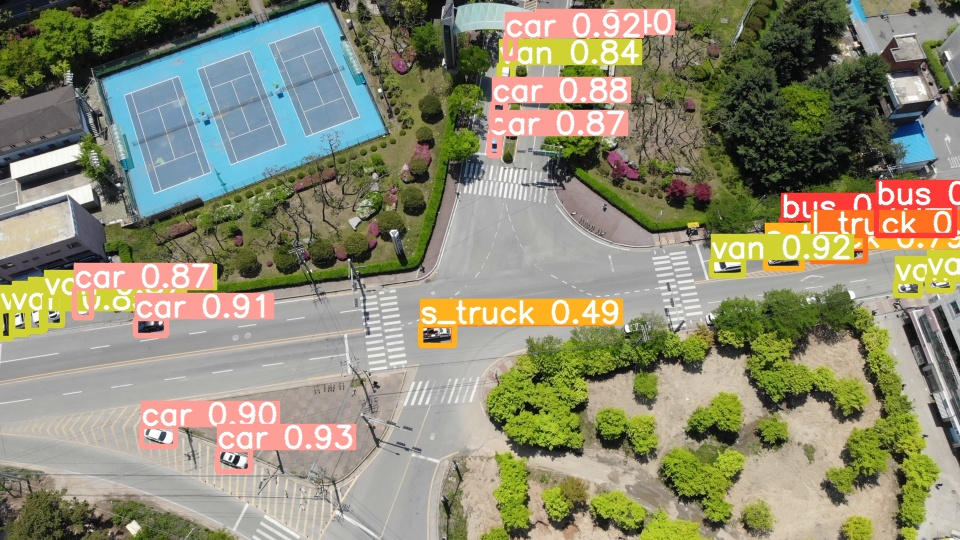

In [15]:
display.Image(filename='runs/detect/exp/220503남서울대정문1225_000.jpg', width=600)

In [ ]:
!python val.py --data ../labeling/dron_dataset/data.yaml --weights runs/train/exp2/weights/best.pt